In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pickle
import nltk
from nltk import *
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import f1_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from time import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import randint as sp_randint
import scipy.sparse as sp
import seaborn as sbn
# from autosklearn.classification import AutoSklearnClassifier

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

def pickle_file(filename, obj):
    with open('dumps/' + filename, 'wb') as f:
        pickle.dump(obj, f)


def unpickle_file(filename):
    with open('dumps/' + filename, 'rb') as f:
        return pickle.load(f)
    
def unpickle_ref(filename):
    with open('ref/' + filename, 'rb') as f:
        return pickle.load(f)
    
def preprocess(text):
# Remove punctuation, stopword and then stemmering
    stop = set(stopwords.words("english"))
    stemmer = stem.PorterStemmer()
    punctuation = set(string.punctuation)

    doc = [stemmer.stem(word) for word in nltk.word_tokenize(text) if (word not in punctuation) and (word not in stop)]

    doc = ' '.join(w for w in doc)
    return doc

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [2]:
# Lecture des dataset
import os
from sys import argv, path
run_dir = os.path.abspath(".")
lib_dir = os.path.join(run_dir, "sample_code")
res_dir = os.path.join(run_dir, "res")
path.append (run_dir)
path.append (lib_dir)
import data_io                      
from data_io import vprint           
from data_manager import DataManager 
import data_io                      
from data_io import vprint           
from data_manager import DataManager 
from data_io import vprint           
from data_manager import DataManager 
from classifier import Classifier     

max_samples = 50000

root_dir = "" # Changer le path
default_input_dir = root_dir + "ref/"
default_output_dir = root_dir + "scoring_input_1_2/res"

input_dir = default_input_dir
output_dir = default_output_dir

datanames = data_io.inventory_data(input_dir)

for basename in datanames:
    D = DataManager(basename, input_dir, replace_missing=True, filter_features=True, max_samples=max_samples)

Info file NOT found : D:\Documents\Pick-The-Sneak-Peek\ref\movies_public.info
Reading ref\movies_train.data...
Converting {} to correct array
Converting ref\movies_train.data to sparse list
Reading ref\movies_test.data...
Converting {} to correct array
Converting ref\movies_test.data to sparse list
Reading ref\movies_valid.data...
Converting {} to correct array
Converting ref\movies_valid.data to sparse list
Reading ref/movies_train.data...
Converting {} to correct array
Converting ref/movies_train.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading ref/movies_valid.data...
Converting {} to correct array
Converting ref/movies_valid.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok sparse matrix to csr sparse matrix
Reading ref/movies_test.data...
Converting {} to correct array
Converting ref/movies_test.data to sparse list
	Converting sparse list to dok sparse matrix
	Converting dok s

In [3]:
X_train = D.data['X_train']
y_train = D.data['Y_train']
X_valid = D.data['X_valid']
X_test = D.data['X_test']

In [ ]:
print(y_train.shape)

In [50]:
def train_linear_svc(features_train, labels_train):
    print ("Training linear SVC")
    clf = LinearSVC(C=1, class_weight='balanced')
    clf = OneVsRestClassifier(clf, n_jobs=4).fit(features_train, labels_train)
    print("ending fitting")
    return clf


def train_randomForest(features_train, labels_train):
    print ("Training random forest")
    clf = RandomForestClassifier(n_estimators=70, max_depth=70)
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_decisionTree(features_train, labels_train):
    print ("Training decision tree")
    clf = tree.DecisionTreeClassifier()
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_adaboost_decision_tree(features_train, labels_train):
    print ("Training adaboost decision tree")
    clf = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=5),
                              n_estimators=600,
                              learning_rate=1)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_autosklearn(features_train, labels_train):
    print ("Training automl")
    clf = autosklearn.classification.AutoSklearnClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf


def train_SGD_l1(features_train, labels_train):
    print ("Training SGD l1")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l1", loss="log")
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf
                        
def train_SGD_l2(features_train, labels_train):
    print ("Training SGD l2")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l2", loss="log")
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_SGD_elasticnet(features_train, labels_train):
    print ("Training SGD elascticnet")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet", loss="log")
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_PassiveAggressiveClassifier(features_train, labels_train):
    print ("Training PassiveAggressiveClassifier")
    clf = PassiveAggressiveClassifier(n_iter=50)
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_RidgeClassifier(features_train, labels_train):
    print ("Training RidgeClassifier")
    clf = RidgeClassifier(tol=1e-2, solver="sag")
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_KNeighborsClassifier(features_train, labels_train):
    print ("Training KNeighborsClassifier")
    clf = KNeighborsClassifier(n_neighbors=5)
    clf = OneVsRestClassifier(clf, n_jobs=4).fit(features_train, labels_train)
    return clf

def train_MultinomialNB(features_train, labels_train):
    print ("Training MultinomialNB")
    clf = MultinomialNB(alpha=.01)
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_BernoulliNB(features_train, labels_train):
    print ("Training BernoulliNB")
    clf = BernoulliNB(alpha=.005)
    clf = OneVsRestClassifier(clf, n_jobs=3).fit(features_train, labels_train)
    return clf

def train_MLP(features_train, labels_train):
    print ("Training MLP")
    clf = MLPClassifier(random_state=0, max_iter=400)
    clf = OneVsRestClassifier(clf, n_jobs=4).fit(features_train, labels_train)
    return clf

def train_NearestCentroid(features_train, labels_train):
    print ("Training NearestCentroid")
    clf = NearestCentroid()
    clf = OneVsRestClassifier(clf, n_jobs=4).fit(features_train, labels_train)
    return clf

In [5]:
y_valid = np.loadtxt("ref/movies_valid.solution")
y_test = np.loadtxt("ref/movies_test.solution")
print(np.count_nonzero(y_train, axis=0))
print(np.count_nonzero(y_valid, axis=0))
print(np.count_nonzero(y_test, axis=0))

[14823  5120  4603  1872  3848  1658  2059  1600  5003  1762  5217  1181
   798  2429]
[2019  687  606  246  530  198  276  213  679  233  704  160   94  312]
[2990 1001  892  364  768  325  424  306  984  347  986  224  158  478]


In [39]:
draw_roc_tab = []

target_names = ["drama", "action", "adventure", "animation", "crime", "fantasy", "music", "mystery", "romance",
                "science fiction", "thriller", "war", "western", "family film"]

def benchmark(clf, name):  
    t0 = time() 
    if name == 'xgboost':
        pred = clf.predict(sp.hstack((X_test, sp.csr_matrix(np.ones((X_test.shape[0],1))))))
    else:
        pred = clf.predict(X_test)
        pred_proba = clf.predict_proba(X_test)
    
#     print(pred)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    score_hamming = hamming_score(y_test, pred)    
    f1_micro = f1_score(y_test, pred, average="micro")
    f1_macro = f1_score(y_test, pred, average="macro")
    f1_weighted = f1_score(y_test, pred, average="weighted")
    f1_samples = f1_score(y_test, pred, average="samples")
    
    print('F1-Score with micro compute: {0}'.format(f1_micro))
    print('F1-Score with macro compute: {0}'.format(f1_macro))
    print('F1-Score with weighted compute: {0}'.format(f1_weighted))
    print('F1-Score with samples compute: {0}'.format(f1_samples))
    print('Hamming score: {0}'.format(score_hamming))
    print "\n"
    print classification_report(y_test, pred, target_names=target_names)
    
    draw_roc_tab.append((y_test, pred_proba, name))
    return name, score_hamming, f1_micro, f1_macro, f1_weighted, f1_samples



def draw_ROC(y_real_and_y_pedit_and_clf_name_list):
    """ y_test_and_y_score: une liste de y_test et y_score.
        [(y_test, y_score, name), (y_test, y_score, name),...]
        y_test est label réal
        y_score est label prédit 
        name est le nom de classification
       """
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from scipy import interp
    # Plot all ROC curves
    plt.figure()
    for y_test, y_score, name in y_real_and_y_pedit_and_clf_name_list:
        n_classes = y_score.shape[1]
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        # Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.plot(fpr["micro"], tpr["micro"],
                 label = name + ' micro ROC (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),  linewidth=2)
        plt.plot(fpr["macro"], tpr["macro"],
                 label = name + ' macro ROC (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),  linewidth=2)

        #for i in range(n_classes):
        #    plt.plot(fpr[i], tpr[i], lw=2,
        #    label='ROC curve of {0} (area = {1:0.2f})'
        #             ''.format(data.columns.values[i+2], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-labels')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

results = []

In [ ]:
# svm_classifier_linear = train_linear_svc(X_train, y_train)
# pickle_file('svm_classifier_linear', svm_classifier_linear)
svm_classifier_linear = unpickle_file('svm_classifier_linear')
results.append(benchmark(svm_classifier_linear, 'svm_classifier_linear'))

In [46]:
# random_forest = train_randomForest(X_train, y_train)
# pickle_file('random_forest', random_forest)
random_forest = unpickle_file('random_forest')
results.append(benchmark(random_forest, 'random_forest'))

test time:  10.584s
F1-Score with micro compute: 0.408874144723
F1-Score with macro compute: 0.103463623592
F1-Score with weighted compute: 0.269476985357
F1-Score with samples compute: 0.422314257731
Hamming score: 0.36643813255


                 precision    recall  f1-score   support

          drama       0.69      0.92      0.79      2990
         action       0.80      0.05      0.10      1001
      adventure       0.73      0.03      0.05       892
      animation       0.91      0.06      0.11       364
          crime       1.00      0.01      0.02       768
        fantasy       0.00      0.00      0.00       325
          music       1.00      0.00      0.00       424
        mystery       0.00      0.00      0.00       306
        romance       0.94      0.02      0.03       984
science fiction       0.89      0.07      0.13       347
       thriller       0.86      0.05      0.09       986
            war       1.00      0.03      0.05       224
        western       1.00

In [47]:
# decision_tree = train_decisionTree(X_train, y_train)
# pickle_file('decision_tree', decision_tree)
decision_tree = unpickle_file('decision_tree')
results.append(benchmark(decision_tree, 'decision_tree'))

test time:  0.287s
F1-Score with micro compute: 0.472241533419
F1-Score with macro compute: 0.406335079453
F1-Score with weighted compute: 0.469621923518
F1-Score with samples compute: 0.447744408166
Hamming score: 0.359108794677


                 precision    recall  f1-score   support

          drama       0.67      0.67      0.67      2990
         action       0.43      0.42      0.42      1001
      adventure       0.41      0.39      0.40       892
      animation       0.49      0.45      0.47       364
          crime       0.41      0.38      0.39       768
        fantasy       0.26      0.24      0.25       325
          music       0.25      0.23      0.24       424
        mystery       0.27      0.22      0.24       306
        romance       0.40      0.38      0.39       984
science fiction       0.51      0.51      0.51       347
       thriller       0.40      0.41      0.40       986
            war       0.44      0.39      0.42       224
        western       0.52

In [48]:
# SGD_l1 = train_SGD_l1(X_train, y_train)
# pickle_file('SGD_l1.dat', SGD_l1)
SGD_l1 = unpickle_file('SGD_l1.dat')
results.append(benchmark(SGD_l1, 'SGD_l1'))

test time:  0.066s
F1-Score with micro compute: 0.527914207182
F1-Score with macro compute: 0.473394237768
F1-Score with weighted compute: 0.536999522043
F1-Score with samples compute: 0.510745832685
Hamming score: 0.410735118076


                 precision    recall  f1-score   support

          drama       0.74      0.72      0.73      2990
         action       0.47      0.56      0.51      1001
      adventure       0.44      0.52      0.48       892
      animation       0.60      0.64      0.62       364
          crime       0.40      0.49      0.44       768
        fantasy       0.28      0.40      0.33       325
          music       0.27      0.38      0.31       424
        mystery       0.23      0.34      0.27       306
        romance       0.40      0.49      0.44       984
science fiction       0.48      0.61      0.54       347
       thriller       0.44      0.52      0.48       986
            war       0.41      0.54      0.46       224
        western       0.52

In [51]:
SGD_l2 = train_SGD_l2(X_train, y_train)
pickle_file('SGD_l2', SGD_l2)
# SGD_l2 = unpickle_file('SGD_l2')
results.append(benchmark(SGD_l2, 'SGD_l2'))

Training SGD l2
test time:  0.114s
F1-Score with micro compute: 0.554535583852
F1-Score with macro compute: 0.503861533829
F1-Score with weighted compute: 0.553732433563
F1-Score with samples compute: 0.532097199786
Hamming score: 0.439047619048


                 precision    recall  f1-score   support

          drama       0.74      0.74      0.74      2990
         action       0.51      0.51      0.51      1001
      adventure       0.48      0.48      0.48       892
      animation       0.73      0.61      0.67       364
          crime       0.47      0.45      0.46       768
        fantasy       0.40      0.37      0.38       325
          music       0.34      0.31      0.33       424
        mystery       0.30      0.26      0.28       306
        romance       0.42      0.45      0.44       984
science fiction       0.64      0.58      0.61       347
       thriller       0.50      0.51      0.51       986
            war       0.57      0.54      0.56       224
        we

In [52]:
SGD_elasticnet = train_SGD_elasticnet(X_train, y_train)
pickle_file('SGD_elasticnet', SGD_elasticnet)
# SGD_elasticnet = unpickle_file('SGD_elasticnet')
results.append(benchmark(SGD_elasticnet, 'SGD_elasticnet'))

Training SGD elascticnet
test time:  0.082s
F1-Score with micro compute: 0.555886144997
F1-Score with macro compute: 0.502444541061
F1-Score with weighted compute: 0.554508830572
F1-Score with samples compute: 0.536093536456
Hamming score: 0.443651881908


                 precision    recall  f1-score   support

          drama       0.73      0.74      0.73      2990
         action       0.54      0.52      0.53      1001
      adventure       0.48      0.47      0.48       892
      animation       0.75      0.62      0.68       364
          crime       0.48      0.47      0.47       768
        fantasy       0.35      0.32      0.33       325
          music       0.33      0.29      0.31       424
        mystery       0.30      0.25      0.27       306
        romance       0.43      0.45      0.44       984
science fiction       0.65      0.61      0.63       347
       thriller       0.51      0.50      0.50       986
            war       0.61      0.47      0.53       224
 

In [12]:
# PassiveAggressiveClassifier = train_PassiveAggressiveClassifier(X_train, y_train)
# pickle_file('PassiveAggressiveClassifier', PassiveAggressiveClassifier)
PassiveAggressiveClassifier = unpickle_file('PassiveAggressiveClassifier')
results.append(benchmark(PassiveAggressiveClassifier, 'PassiveAggressiveClassifier'))

test time:  0.043s
F1-Score with micro compute: 0.562624254473
F1-Score with macro compute: 0.518008128496
F1-Score with weighted compute: 0.561555691644
F1-Score with samples compute: 0.540027672839
Hamming score: 0.448499137167


                 precision    recall  f1-score   support

          drama       0.74      0.73      0.73      2990
         action       0.53      0.53      0.53      1001
      adventure       0.48      0.50      0.49       892
      animation       0.76      0.63      0.69       364
          crime       0.49      0.48      0.48       768
        fantasy       0.43      0.37      0.39       325
          music       0.34      0.28      0.31       424
        mystery       0.32      0.25      0.28       306
        romance       0.43      0.45      0.44       984
science fiction       0.69      0.58      0.63       347
       thriller       0.50      0.51      0.51       986
            war       0.66      0.53      0.59       224
        western       0.80

In [13]:
# RidgeClassifier = train_RidgeClassifier(X_train, y_train)
# pickle_file('RidgeClassifier', RidgeClassifier)
RidgeClassifier = unpickle_file('RidgeClassifier')
results.append(benchmark(RidgeClassifier, 'RidgeClassifier'))

test time:  0.043s
F1-Score with micro compute: 0.451952081358
F1-Score with macro compute: 0.410630695533
F1-Score with weighted compute: 0.469694388734
F1-Score with samples compute: 0.429367750543
Hamming score: 0.329697231161


                 precision    recall  f1-score   support

          drama       0.69      0.67      0.68      2990
         action       0.39      0.50      0.44      1001
      adventure       0.36      0.42      0.38       892
      animation       0.53      0.50      0.51       364
          crime       0.29      0.48      0.36       768
        fantasy       0.29      0.29      0.29       325
          music       0.28      0.30      0.29       424
        mystery       0.12      0.35      0.17       306
        romance       0.32      0.46      0.38       984
science fiction       0.41      0.49      0.44       347
       thriller       0.30      0.50      0.38       986
            war       0.55      0.42      0.48       224
        western       0.67

In [53]:
# KNeighborsClassifier = train_KNeighborsClassifier(X_train, y_train)
# pickle_file('KNeighborsClassifier', KNeighborsClassifier)
KNeighborsClassifier = unpickle_file('KNeighborsClassifier')
results.append(benchmark(KNeighborsClassifier, 'KNeighborsClassifier'))

test time:  440.607s
F1-Score with micro compute: 0.443814250266
F1-Score with macro compute: 0.308602401124
F1-Score with weighted compute: 0.402514661705
F1-Score with samples compute: 0.431882219424
Hamming score: 0.364125507206


                 precision    recall  f1-score   support

          drama       0.67      0.77      0.71      2990
         action       0.46      0.22      0.29      1001
      adventure       0.50      0.22      0.31       892
      animation       0.75      0.46      0.57       364
          crime       0.35      0.14      0.20       768
        fantasy       0.53      0.14      0.22       325
          music       0.31      0.08      0.13       424
        mystery       0.33      0.05      0.08       306
        romance       0.33      0.22      0.26       984
science fiction       0.72      0.19      0.30       347
       thriller       0.36      0.19      0.25       986
            war       0.72      0.21      0.33       224
        western       0.

In [54]:
# MultinomialNB = train_MultinomialNB(X_train, y_train)
# pickle_file('MultinomialNB', MultinomialNB)
MultinomialNB = unpickle_file('MultinomialNB')
results.append(benchmark(MultinomialNB, 'MultinomialNB'))

test time:  0.755s
F1-Score with micro compute: 0.498828023266
F1-Score with macro compute: 0.427587118048
F1-Score with weighted compute: 0.511524919731
F1-Score with samples compute: 0.487015316404
Hamming score: 0.393613331929


                 precision    recall  f1-score   support

          drama       0.73      0.73      0.73      2990
         action       0.44      0.54      0.48      1001
      adventure       0.42      0.58      0.49       892
      animation       0.54      0.64      0.58       364
          crime       0.36      0.45      0.40       768
        fantasy       0.25      0.40      0.30       325
          music       0.21      0.33      0.26       424
        mystery       0.17      0.28      0.21       306
        romance       0.35      0.47      0.40       984
science fiction       0.41      0.53      0.47       347
       thriller       0.39      0.53      0.45       986
            war       0.27      0.38      0.31       224
        western       0.44

In [55]:
# BernoulliNB = train_BernoulliNB(X_train, y_train)
# pickle_file('BernoulliNB', BernoulliNB)
BernoulliNB = unpickle_file('BernoulliNB')
results.append(benchmark(BernoulliNB, 'BernoulliNB'))

test time:  0.800s
F1-Score with micro compute: 0.552025623269
F1-Score with macro compute: 0.477098140977
F1-Score with weighted compute: 0.55845088099
F1-Score with samples compute: 0.534046593302
Hamming score: 0.437387948323


                 precision    recall  f1-score   support

          drama       0.72      0.84      0.77      2990
         action       0.51      0.52      0.51      1001
      adventure       0.42      0.55      0.48       892
      animation       0.49      0.58      0.53       364
          crime       0.50      0.48      0.49       768
        fantasy       0.25      0.52      0.34       325
          music       0.32      0.48      0.38       424
        mystery       0.26      0.37      0.31       306
        romance       0.43      0.62      0.51       984
science fiction       0.39      0.59      0.47       347
       thriller       0.46      0.50      0.47       986
            war       0.52      0.59      0.55       224
        western       0.29 

In [44]:
# MLP = train_MLP(X_train, y_train)
# pickle_file('MLP', MLP)
MLP = unpickle_file('MLP')
results.append(benchmark(MLP, 'MLP'))

test time:  2.461s
F1-Score with micro compute: 0.533229919046
F1-Score with macro compute: 0.477427479079
F1-Score with weighted compute: 0.537160762718
F1-Score with samples compute: 0.513484473955
Hamming score: 0.419756541206


                 precision    recall  f1-score   support

          drama       0.74      0.73      0.73      2990
         action       0.50      0.51      0.50      1001
      adventure       0.46      0.42      0.44       892
      animation       0.61      0.59      0.60       364
          crime       0.43      0.52      0.47       768
        fantasy       0.28      0.48      0.36       325
          music       0.30      0.29      0.30       424
        mystery       0.21      0.26      0.24       306
        romance       0.41      0.45      0.43       984
science fiction       0.61      0.49      0.54       347
       thriller       0.53      0.45      0.49       986
            war       0.47      0.52      0.49       224
        western       0.68

In [56]:
draw_roc_tab

[(array([[ 1.,  1.,  1., ...,  0.,  1.,  0.],
         [ 0.,  1.,  1., ...,  0.,  1.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 1.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  1., ...,  0.,  0.,  0.]]),
  array([[ 0.64756348,  0.32101043,  0.29142589, ...,  0.02327771,
           0.36771438,  0.0844655 ],
         [ 0.46034628,  0.35621743,  0.45635964, ...,  0.07414802,
           0.02101909,  0.09808823],
         [ 0.6757755 ,  0.09208866,  0.05151715, ...,  0.02518938,
           0.0103976 ,  0.05867321],
         ..., 
         [ 0.62961178,  0.11401986,  0.09854859, ...,  0.0108475 ,
           0.02433263,  0.03061499],
         [ 0.6858806 ,  0.09659838,  0.05327983, ...,  0.02501404,
           0.00974381,  0.06541489],
         [ 0.40839636,  0.30467227,  0.34405125, ...,  0.01018325,
           0.03792507,  0.03447882]]),
  'random_forest'),
 (array([[ 1.,  1.,  1., ...,  0.,  1.,  0.],


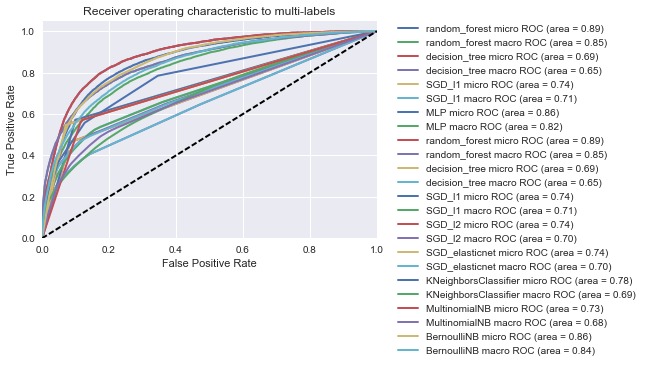

In [57]:
draw_ROC(draw_roc_tab)

In [25]:
from sklearn.utils import resample
from sklearn.metrics import f1_score
score = []
for i in range(500):
    X_sub_test, y_sub_test = resample(X_test, y_test,replace=True)
    y_pred = SGD_l2.predict(X_sub_test)
    f1_weighted = f1_score(y_sub_test, y_pred, average = "weighted")
    score.append(f1_weighted)
print np.std(score)

0.00434944281556


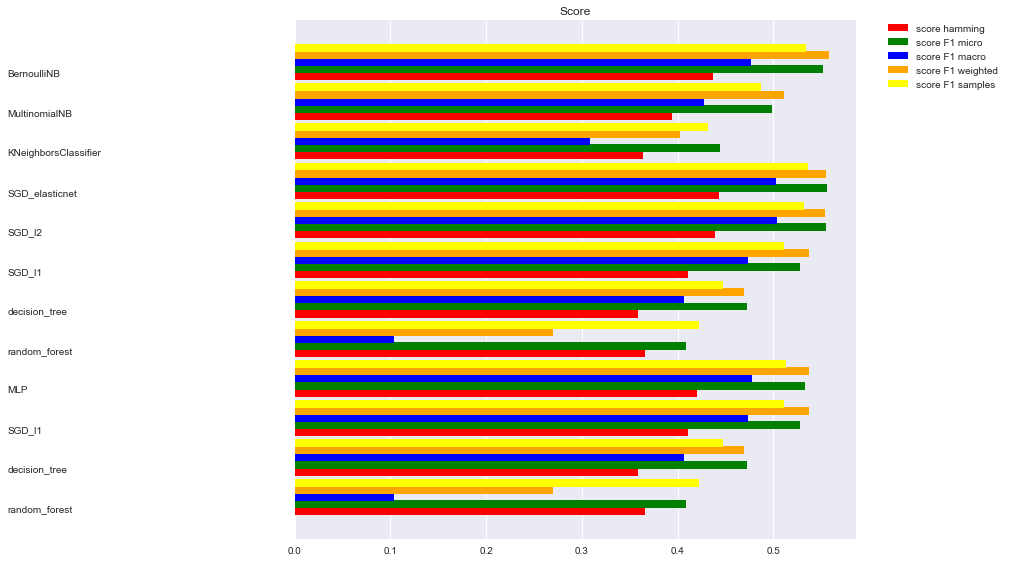

In [58]:
%matplotlib inline

indices = np.arange(len(results))

results_final = [[x[i] for x in results] for i in range(6)]
width = 0.18  
clf_names, score_hamming,f1_micro, f1_macro, f1_weighted, f1_samples = results_final
# test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score_hamming, .2, label="score hamming", color='red')
plt.barh(indices + width, f1_micro, .2, label="score F1 micro", color='green')
plt.barh(indices + 2*width, f1_macro, .2, label="score F1 macro", color='blue')
plt.barh(indices + 3*width, f1_weighted, .2, label="score F1 weighted", color='orange')
plt.barh(indices + 4*width, f1_samples, .2, label="score F1 samples", color='yellow')

plt.yticks(())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()